In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x11b983400>,
 'week2': <src.game.Game at 0x11b99b0f0>,
 'week3': <src.game.Game at 0x11b9b2d68>,
 'week4': <src.game.Game at 0x1094a8b70>,
 'week5': <src.game.Game at 0x1094bdac8>,
 'week6': <src.game.Game at 0x11ba4d828>,
 'week7': <src.game.Game at 0x11ba55fd0>,
 'week8': <src.game.Game at 0x11ba7a828>,
 'week10': <src.game.Game at 0x11ba9e630>,
 'week11': <src.game.Game at 0x11bab1b70>,
 'week12': <src.game.Game at 0x11bac3fd0>,
 'week13': <src.game.Game at 0x11bae52e8>,
 'week14': <src.game.Game at 0x11baf6588>,
 'week15': <src.game.Game at 0x11c8d2390>,
 'week16': <src.game.Game at 0x11c8d98d0>,
 'week17': <src.game.Game at 0x11ca3f828>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [63]:
play_number = 8

In [64]:
play = game.plays[play_number - 1]

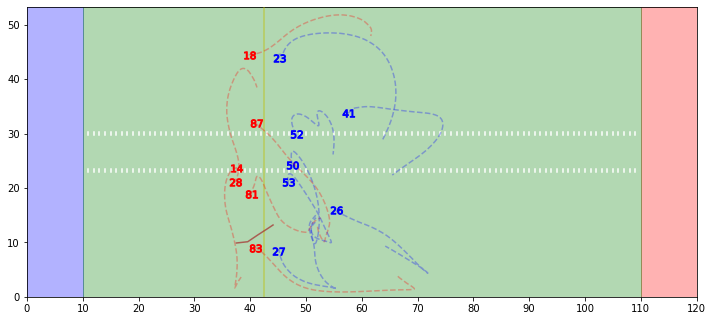

In [65]:
play.plot_play(markers='number')

In [71]:
corners = play.return_players_by_position('CB')

In [72]:
for cb in corners:
    print(f'{cb.name} - {cb.number} - {cb.position}')

Nate Hairston - 27 - CB
Kenny Moore II - 23 - CB


In [73]:
receivers = play.return_players_by_position('WR') + play.return_players_by_position('TE')

In [74]:
for r in receivers:
    print(f'{r.name} - {r.number} - {r.position}')

A.J. Green - 18 - WR
Tyler Boyd - 83 - WR
C.J. Uzomah - 87 - TE
Tyler Kroft - 81 - TE


In [75]:
start = play.events['ball_snap']
for cb in corners:
    print(f'{cb.name} - {cb.number} - ({cb.distance_from_center(start):.1f})')

Nate Hairston - 27 - (-18.0)
Kenny Moore II - 23 - (17.9)


In [76]:
start = play.events['ball_snap']
for r in receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

A.J. Green - 18 - (17.9)
Tyler Boyd - 83 - (-17.7)
C.J. Uzomah - 87 - (5.3)
Tyler Kroft - 81 - (-7.9)


In [61]:
top_corners = []
bottom_corners = []
for cb in corners:
    if cb.distance_from_center(start) > 0:
        top_corners.append(cb)
    else:
        bottom_corners.append(cb)

In [78]:
unlocked_top_receivers = []
unlocked_bottom_receivers = []
for r in receivers:
    if r.distance_from_center(start) > 0:
        unlocked_top_receivers.append(r)
    else:
        unlocked_bottom_receivers.append(r)

In [79]:
start = play.events['ball_snap']

top_corners.sort(reverse=True, key=lambda player: player.distance_from_center(start))
bottom_corners.sort(key=lambda player: player.distance_from_center(start))

unlocked_top_receivers.sort(reverse=True, key=lambda player: player.distance_from_center(start))
unlocked_bottom_receivers.sort(key=lambda player: player.distance_from_center(start))

In [80]:
for r in unlocked_top_receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

A.J. Green - 18 - (17.9)
C.J. Uzomah - 87 - (5.3)


In [81]:
for r in unlocked_bottom_receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

Tyler Boyd - 83 - (-17.7)
Tyler Kroft - 81 - (-7.9)


In [48]:
for cb in corners:
    print(f'{cb.name} ({cb.number})')
    for wr in receivers:
        delta = cb.distance_from_center(start) - wr.distance_from_center(start)
        print(f'  Distance between {cb.name} and {wr.name} = {delta:.1f}')

Nate Hairston (27)
  Distance between Nate Hairston and A.J. Green = -0.8
  Distance between Nate Hairston and John Ross = -5.3
  Distance between Nate Hairston and Tyler Boyd = -11.0
  Distance between Nate Hairston and Tyler Eifert = -23.3
Kenny Moore II (23)
  Distance between Kenny Moore II and A.J. Green = 6.9
  Distance between Kenny Moore II and John Ross = 2.5
  Distance between Kenny Moore II and Tyler Boyd = -3.3
  Distance between Kenny Moore II and Tyler Eifert = -15.5
Quincy Wilson (31)
  Distance between Quincy Wilson and A.J. Green = 25.6
  Distance between Quincy Wilson and John Ross = 21.1
  Distance between Quincy Wilson and Tyler Boyd = 15.4
  Distance between Quincy Wilson and Tyler Eifert = 3.1
